In [1]:
import pandas as pd
from urllib.request import urlopen

import matplotlib.pyplot as plt
from PIL import Image

from mplsoccer import PyPizza, add_image, FontManager

from scipy import stats
import math

In [18]:
URL3 = 'https://github.com/VanillaandCream/Catamaran-Tamil/blob/master/Fonts/Catamaran-Medium.ttf?raw=true'
catamaran2 = FontManager(URL3)
URL = 'https://github.com/google/fonts/blob/main/ofl/fjallaone/FjallaOne-Regular.ttf?raw=true'
robotto_regular = FontManager(URL)
URL2 = 'https://github.com/VanillaandCream/Catamaran-Tamil/blob/master/Fonts/Catamaran-ExtraBold.ttf?raw=true'
catamaran = FontManager(URL2)

imagen = "enzo.png"
fdj_cropped = Image.open(imagen)
#Usen esta imagen para generar imagenes circulares: https://crop-circle.imageonline.co/

In [3]:
df = pd.read_excel('Copa de la Liga 2022.xlsx')

In [4]:
df.head()

,#,Team,Name,Posicion,Lado,Rating,Appearances,Started,Minutes played,Yellow cards,...,Headed goals,Headed goals per 90,Left foot goals,Right foot goals,Hit woodwork,Hit woodwork per 90,Offsides,Offsides per 90,Penalty conversion,Set piece conversion %
0,1.0,NaN,Brahian Alemán,Mediocampista,ofensivo,7.68,13.0,13.0,1158.0,8.0,...,0.0,0.000000,5.0,1.0,NaN,0.0,20.0,1.554404,NaN,NaN
1,2.0,NaN,Enzo Fernández,Mediocampista,NaN,7.64,15.0,13.0,1179.0,1.0,...,0.0,0.000000,1.0,2.0,NaN,0.0,0.0,0.000000,NaN,NaN
2,3.0,NaN,Alejandro Medina,Arquero,0,7.6,4.0,4.0,360.0,0.0,...,0.0,0.000000,0.0,3.0,NaN,0.0,0.0,0.000000,NaN,NaN
3,4.0,NaN,Franco Cristaldo,Mediocampista,0,7.57,14.0,13.0,1107.0,2.0,...,1.0,0.081301,0.0,4.0,NaN,0.0,0.0,0.000000,NaN,NaN
4,5.0,NaN,Martín Ojeda,Extremo,0,7.56,14.0,14.0,1254.0,0.0,...,0.0,0.000000,5.0,5.0,NaN,0.0,0.0,0.000000,NaN,NaN


In [5]:
medios = df[(df['Posicion'] == 'Mediocampista') & (df['Minutes played'] > 350)]
medios.head()

,#,Team,Name,Posicion,Lado,Rating,Appearances,Started,Minutes played,Yellow cards,...,Headed goals,Headed goals per 90,Left foot goals,Right foot goals,Hit woodwork,Hit woodwork per 90,Offsides,Offsides per 90,Penalty conversion,Set piece conversion %
0,1.0,NaN,Brahian Alemán,Mediocampista,ofensivo,7.68,13.0,13.0,1158.0,8.0,...,0.0,0.000000,5.0,1.0,NaN,0.0,20.0,1.554404,NaN,NaN
1,2.0,NaN,Enzo Fernández,Mediocampista,NaN,7.64,15.0,13.0,1179.0,1.0,...,0.0,0.000000,1.0,2.0,NaN,0.0,0.0,0.000000,NaN,NaN
3,4.0,NaN,Franco Cristaldo,Mediocampista,0,7.57,14.0,13.0,1107.0,2.0,...,1.0,0.081301,0.0,4.0,NaN,0.0,0.0,0.000000,NaN,NaN
20,84.0,NaN,Leonel Picco,Mediocampista,defensivo,7.04,7.0,5.0,399.0,2.0,...,0.0,0.000000,0.0,84.0,NaN,0.0,0.0,0.000000,NaN,NaN
24,25.0,NaN,Leonel Miranda,Mediocampista,0,7.24,12.0,12.0,980.0,3.0,...,1.0,0.091837,0.0,25.0,NaN,0.0,0.0,0.000000,NaN,NaN


In [6]:
medios_plot = medios[['Name', 'Total duels won %', 'Fouls per 90', 'Possesion lost per 90','Acc. long balls per 90', 'Acc. Passes per 90', 'Accurate passes %', 'Dribbled past per 90', 'Tackles per 90', 'Interceptions per 90', 'Clearances per 90','Key passes per 90', 'Total shots per 90']].reset_index(drop=True)
medios_plot

,Name,Total duels won %,Fouls per 90,Possesion lost per 90,Acc. long balls per 90,Acc. Passes per 90,Accurate passes %,Dribbled past per 90,Tackles per 90,Interceptions per 90,Clearances per 90,Key passes per 90,Total shots per 90
0,Brahian Alemán,59.20,0.932642,23.005181,3.963731,25.025907,74.02,0.777202,1.787565,1.088083,1.787565,2.409326,3.031088
1,Enzo Fernández,50.72,1.068702,16.793893,4.885496,61.679389,83.56,1.145038,2.290076,0.839695,0.229008,2.595420,2.824427
2,Franco Cristaldo,55.13,0.650407,19.024390,3.739837,37.804878,81.15,1.300813,2.601626,0.975610,0.243902,3.008130,1.707317
3,Leonel Picco,63.24,1.127820,14.210526,0.902256,27.969925,80.00,0.902256,6.766917,1.804511,1.578947,0.902256,1.578947
4,Leonel Miranda,47.79,2.112245,15.612245,2.846939,50.602041,83.36,1.285714,2.112245,0.734694,0.275510,1.744898,2.020408
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,Pablo Pérez,44.78,2.556818,20.326705,2.556818,36.306818,72.63,2.301136,2.556818,1.022727,0.639205,1.534091,0.767045
105,Juan Nardoni,42.34,2.775330,14.867841,1.585903,18.733480,68.98,1.486784,0.991189,0.991189,0.792952,0.198238,0.594714
106,Nicolás Domingo,38.54,1.875000,12.500000,3.125000,25.312500,71.05,1.979167,1.562500,1.562500,1.875000,0.520833,0.520833
107,Raúl Loaiza,47.83,0.810811,6.891892,1.216216,30.270270,87.50,0.810811,1.216216,1.351351,2.432432,0.405405,0.540541


In [7]:
params = list(medios_plot.columns[1:]) 
params

['Total duels won %',
 'Fouls per 90',
 'Possesion lost per 90',
 'Acc. long balls per 90',
 'Acc. Passes per 90',
 'Accurate passes %',
 'Dribbled past per 90',
 'Tackles per 90',
 'Interceptions per 90',
 'Clearances per 90',
 'Key passes per 90',
 'Total shots per 90']

In [8]:
jugador = list(medios_plot[medios_plot['Name'] == 'Enzo Fernández'].iloc[0].values[1:])
jugador

[50.72,
 1.0687022900763359,
 16.793893129770993,
 4.885496183206107,
 61.6793893129771,
 83.56,
 1.1450381679389312,
 2.2900763358778624,
 0.8396946564885496,
 0.22900763358778625,
 2.595419847328244,
 2.8244274809160306]

In [9]:
values = []
for x in range(len(params)):   
    values.append(math.floor(stats.percentileofscore(medios_plot[params[x]],jugador[x])))

values

[52, 25, 69, 93, 100, 79, 49, 55, 32, 13, 95, 96]

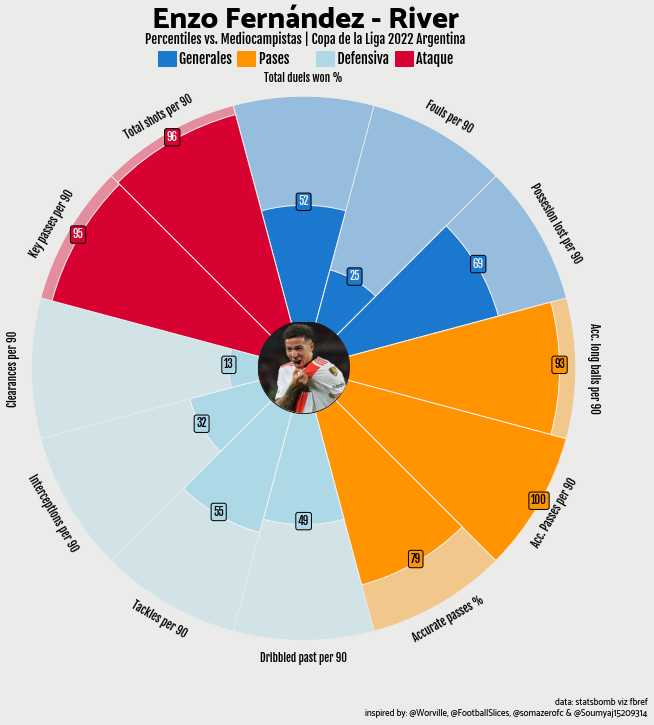

In [23]:
# parameter list --> ya definida

# value list --> ya definido
# The values are taken from the excellent fbref website (supplied by StatsBomb)

# color for the slices and text
slice_colors = ["#1A78CF"] * 3 + ["#FF9300"] * 3 + ['lightblue'] * 4 + ["#D70232"] * 2
text_colors = ["#F2F2F2"] * 3 + ["#000000"] * 7 + ["#F2F2F2"] * 2

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#EBEBE9",     # background color
    straight_line_color="#EBEBE9",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(10, 10),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        fontproperties=robotto_regular.prop, va="center"
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=11,
        fontproperties=robotto_regular.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.975, "Enzo Fernández - River", size=30,
    ha="center", fontproperties=catamaran.prop, color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.953,
    "Percentiles vs. Mediocampistas | Copa de la Liga 2022 Argentina",
    size=13,
    ha="center", fontproperties=robotto_regular.prop, color="#000000"
)

# add credits
CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
    0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    fontproperties=catamaran2.prop, color="#000000",
    ha="right"
)

# add text
fig.text(
    0.34, 0.925, "Generales         Pases                Defensiva         Ataque", size=14,
    fontproperties=robotto_regular.prop, color="#000000"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.42, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.53, 0.9225), 0.025, 0.021, fill=True, color="lightblue",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.64, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
        transform=fig.transFigure, figure=fig
    ),
])

# add image
ax_image = add_image(
    fdj_cropped, fig, left=0.4478, bottom=0.44, width=0.13, height=0.127
)   # these values might differ when you are plotting

plt.show()

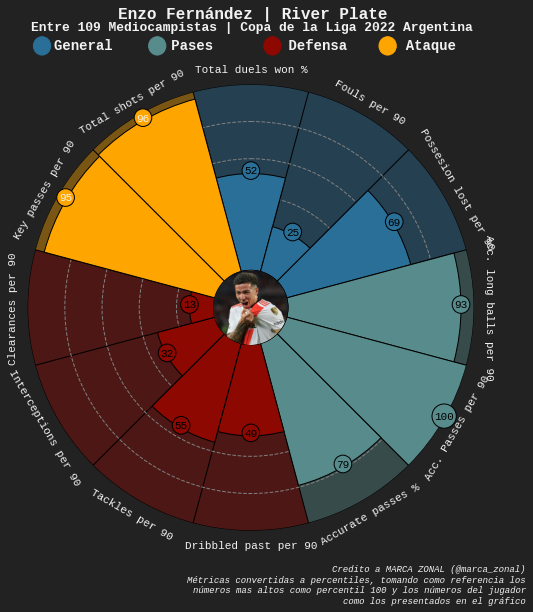

In [45]:
# color for the slices and text
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/cousine/Cousine-Regular.ttf?raw=true"))
font_italic = FontManager(("https://github.com/google/fonts/blob/main/apache/cousine/Cousine-Italic.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/cousine/Cousine-Bold.ttf?raw=true"))
slice_colors = ["#2a6f97"] * 3 + ["#588b8b"] * 3 + ["#8d0801"] * 4 + ['orange'] * 2
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 2

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#222222",     # background color
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_color="#000000",    # color for last line
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=1,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(8, 8.5),                # adjust the figsize according to your need
    color_blank_space="same",        # use the same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#000000", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_normal.prop, va="center"
    ),                               # values to be used when adding parameter labels
    kwargs_values=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="circle,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values labels
)

# add title
fig.text(
    0.515, 0.975, "Enzo Fernández | River Plate", size=16,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)

# add subtitle
total = medios_plot.shape[0]
posicion = medios['Posicion'].iloc[0]
fig.text(
    0.515, 0.955,
    f"Entre {total} {posicion}s | Copa de la Liga 2022 Argentina",
    size=13,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)

# add credits
CREDIT_1 = "Credito a MARCA ZONAL (@marca_zonal)"
CREDIT_2 = "Métricas convertidas a percentiles, tomando como referencia los\nnúmeros mas altos como percentil 100 y los números del jugador\ncomo los presentados en el gráfico"

fig.text(
    0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    fontproperties=font_italic.prop, color="#F2F2F2",
    ha="right"
)

# add text
fig.text(
    0.17, 0.925, "General       Pases         Defensa       Ataque", size=14,
    fontproperties=font_bold.prop, color="#F2F2F2"
)

# add rectangles
fig.patches.extend([
    plt.Circle(
        (0.15, 0.93), 0.015, fill=True, color="#2a6f97",
        transform=fig.transFigure, figure=fig
    ),
    plt.Circle(
        (0.35, 0.93), 0.015, fill=True, color="#588b8b",
        transform=fig.transFigure, figure=fig
    ),
    plt.Circle(
        (0.55, 0.93), 0.015, fill=True, color="#8d0801",
        transform=fig.transFigure, figure=fig
    ),
    plt.Circle(
        (0.75, 0.93), 0.015, fill=True, color="orange",
        transform=fig.transFigure, figure=fig
    ),
])

# add image
ax_image = add_image(
    fdj_cropped, fig, left=0.44723902, bottom=0.4315, width=0.13, height=0.142
)   # these values might differ when you are plotting